In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
from scipy.stats import linregress
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Setting up pathway of data and reading it
csv_path = Path("Resource/123.csv")
df = pd.read_csv(csv_path)
df.head()

,REF_DATE,GEO,DGUID,Prices,Seasonal adjustment,Estimates,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1961-01,Canada,2016A000011124,Chained (2012) dollars,Seasonally adjusted at annual rates,Food and non-alcoholic beverages [C11],Dollars,81,millions,6,v61988958,1.1.1.1,37146,NaN,NaN,NaN,0
1,1961-04,Canada,2016A000011124,Chained (2012) dollars,Seasonally adjusted at annual rates,Food and non-alcoholic beverages [C11],Dollars,81,millions,6,v61988958,1.1.1.1,38476,NaN,NaN,NaN,0
2,1961-07,Canada,2016A000011124,Chained (2012) dollars,Seasonally adjusted at annual rates,Food and non-alcoholic beverages [C11],Dollars,81,millions,6,v61988958,1.1.1.1,38871,NaN,NaN,NaN,0
3,1961-10,Canada,2016A000011124,Chained (2012) dollars,Seasonally adjusted at annual rates,Food and non-alcoholic beverages [C11],Dollars,81,millions,6,v61988958,1.1.1.1,38446,NaN,NaN,NaN,0
4,1962-01,Canada,2016A000011124,Chained (2012) dollars,Seasonally adjusted at annual rates,Food and non-alcoholic beverages [C11],Dollars,81,millions,6,v61988958,1.1.1.1,39497,NaN,NaN,NaN,0


In [3]:
# Assume df is your DataFrame and 'date' is your column with dates
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'], format='%Y-%m')

df["REF_YEAR"] = df["REF_DATE"].dt.year

clean_df = df.groupby(['REF_YEAR', 'Estimates']).sum()
# Set 'date' as index if it's not yet
#df.set_index('REF_DATE', inplace=True)

# Resample to yearly data, taking the mean of each year
# df_yearly = df.resample('Y').sum()


# df_yearly

In [4]:
#Resetting the index
clean_df.reset_index(inplace=True)

In [5]:
#Checking the data
clean_df

,REF_YEAR,Estimates,UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1961,"Alcoholic beverages, tobacco and cannabis [C12]",324,24,59899,0.0,0.0,0.0,0
1,1961,Clothing and footwear [C13],324,24,31637,0.0,0.0,0.0,0
2,1961,Communications [C18],324,24,4147,0.0,0.0,0.0,0
3,1961,Education [C21],324,24,7312,0.0,0.0,0.0,0
4,1961,Food and non-alcoholic beverages [C11],324,24,152939,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
940,2023,Insurance and financial services [C23],81,6,124753,0.0,0.0,0.0,0
941,2023,Miscellaneous goods and services [C24],81,6,64466,0.0,0.0,0.0,0
942,2023,Net expenditure abroad [C25],81,6,1504,0.0,0.0,0.0,0
943,2023,Recreation and culture [C19],81,6,104858,0.0,0.0,0.0,0


In [6]:
# Picking only the years i want from the data
filter_data = clean_df.loc[(clean_df["REF_YEAR"] == 2022)|
                           (clean_df["REF_YEAR"] == 2021)|
                           (clean_df["REF_YEAR"] == 2020)|
                           (clean_df["REF_YEAR"] == 2019)|
                           (clean_df["REF_YEAR"] == 2018)
]

In [7]:
# Checking that data
filter_data

,REF_YEAR,Estimates,UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
855,2018,"Alcoholic beverages, tobacco and cannabis [C12]",324,24,162741,0.0,0.0,0.0,0
856,2018,Clothing and footwear [C13],324,24,199117,0.0,0.0,0.0,0
857,2018,Communications [C18],324,24,127348,0.0,0.0,0.0,0
858,2018,Education [C21],324,24,74365,0.0,0.0,0.0,0
859,2018,Food and non-alcoholic beverages [C11],324,24,416591,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
925,2022,Insurance and financial services [C23],324,24,509040,0.0,0.0,0.0,0
926,2022,Miscellaneous goods and services [C24],324,24,255727,0.0,0.0,0.0,0
927,2022,Net expenditure abroad [C25],324,24,492,0.0,0.0,0.0,0
928,2022,Recreation and culture [C19],324,24,407300,0.0,0.0,0.0,0


In [8]:
# Getting rid of the partial strings that i don't want
filter_data['Estimates'] = filter_data['Estimates'].map(lambda x: x.rstrip('[]C0123456789'))


In [9]:
#checking the data
filter_data.head()

,REF_YEAR,Estimates,UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
855,2018,"Alcoholic beverages, tobacco and cannabis",324,24,162741,0.0,0.0,0.0,0
856,2018,Clothing and footwear,324,24,199117,0.0,0.0,0.0,0
857,2018,Communications,324,24,127348,0.0,0.0,0.0,0
858,2018,Education,324,24,74365,0.0,0.0,0.0,0
859,2018,Food and non-alcoholic beverages,324,24,416591,0.0,0.0,0.0,0


In [10]:
# Making Estimate the index
filter_data.set_index("Estimates", inplace=True)


In [11]:
# Checking the data
filter_data.tail(20)

,REF_YEAR,UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
Estimates,,,,,,,,
Insurance and financial services,2021,324,24,503981,0.0,0.0,0.0,0
Miscellaneous goods and services,2021,324,24,236481,0.0,0.0,0.0,0
Net expenditure abroad,2021,324,24,-27792,0.0,0.0,0.0,0
Recreation and culture,2021,324,24,384287,0.0,0.0,0.0,0
Transport,2021,324,24,614301,0.0,0.0,0.0,0
"Alcoholic beverages, tobacco and cannabis",2022,324,24,171608,0.0,0.0,0.0,0
Clothing and footwear,2022,324,24,224931,0.0,0.0,0.0,0
Communications,2022,324,24,156765,0.0,0.0,0.0,0
Education,2022,324,24,79914,0.0,0.0,0.0,0


In [12]:
# Checking the index, checking for spaces, for locating later.
filter_data.index.unique()

Index(['Alcoholic beverages,  tobacco and cannabis ', 'Clothing and footwear ',
       'Communications ', 'Education ', 'Food and non-alcoholic beverages ',
       'Food, beverage and accommodation services ',
       'Furnishings, household equipment and other goods and services related to the dwelling and property ',
       'Health ', 'Household final consumption expenditure ',
       'Housing, water, electricity, gas and other fuels ',
       'Insurance and financial services ',
       'Miscellaneous goods and services ', 'Net expenditure abroad ',
       'Recreation and culture ', 'Transport '],
      dtype='object', name='Estimates')

In [13]:
filter_data_net = filter_data

In [14]:
# Dropping the HouseHold Final Consumption as it is just the sum of all expense.
filter_data = filter_data.drop(['Household final consumption expenditure '], axis=0)

In [15]:
# Renaming one of the index, since it is too long.
filter_data.rename(index={'Furnishings, household equipment and other goods and services related to the dwelling and property ':"Household Equipment"}, inplace= True)

In [16]:
#2018
data2018 = filter_data.loc[filter_data["REF_YEAR"]== 2018]
#2019
data2019 = filter_data.loc[filter_data["REF_YEAR"]== 2019]
#2020
data2020 = filter_data.loc[filter_data["REF_YEAR"]== 2020]
#2021
data2021 = filter_data.loc[filter_data["REF_YEAR"]== 2021]
#2022
data2022 = filter_data.loc[filter_data["REF_YEAR"]== 2022]


In [17]:
# Renaming the VALUE columns according to the year of the data 
data2022.rename({'VALUE': '2022V'},axis='columns', inplace= True)

data2021.rename({'VALUE': '2021V'},axis='columns', inplace= True)

data2020.rename({'VALUE': '2020V'},axis='columns', inplace= True)

data2019.rename({'VALUE': '2019V'},axis='columns', inplace= True)

data2018.rename({'VALUE': '2018V'},axis='columns', inplace= True)

# Picking only the data i want
df2022 = data2022[["2022V"]]

df2021 = data2021[["2021V"]]

df2020 = data2020[["2020V"]]

df2019 = data2019[["2019V"]]

df2018 = data2018[["2018V"]]



In [18]:
# Merging all the data into one, to create a comaprison of Year 2018 ~2022
merge = df2022.join(df2021, how = "outer")
merge = merge.join(df2020, how = "outer")
merge = merge.join(df2019, how = "outer")
merge = merge.join(df2018, how = "outer")

In [19]:
# Visualizing the data
merge

,2022V,2021V,2020V,2019V,2018V
Estimates,,,,,
"Alcoholic beverages, tobacco and cannabis",171608,173929,171243,162677,162741
Clothing and footwear,224931,193730,163667,201448,199117
Communications,156765,149066,138396,133951,127348
Education,79914,76364,75572,77016,74365
Food and non-alcoholic beverages,431236,447520,449754,417892,416591
"Food, beverage and accommodation services",304513,255966,222441,318419,311833
Household Equipment,281618,291442,272205,261170,254043
Health,214867,201265,186087,204621,199588
"Housing, water, electricity, gas and other fuels",1229010,1198077,1165092,1135754,1109154


In [20]:
#Checking for all the index
merge.index

Index(['Alcoholic beverages,  tobacco and cannabis ', 'Clothing and footwear ',
       'Communications ', 'Education ', 'Food and non-alcoholic beverages ',
       'Food, beverage and accommodation services ', 'Household Equipment',
       'Health ', 'Housing, water, electricity, gas and other fuels ',
       'Insurance and financial services ',
       'Miscellaneous goods and services ', 'Net expenditure abroad ',
       'Recreation and culture ', 'Transport '],
      dtype='object', name='Estimates')

In [21]:
matplotlib.style.use('fivethirtyeight')

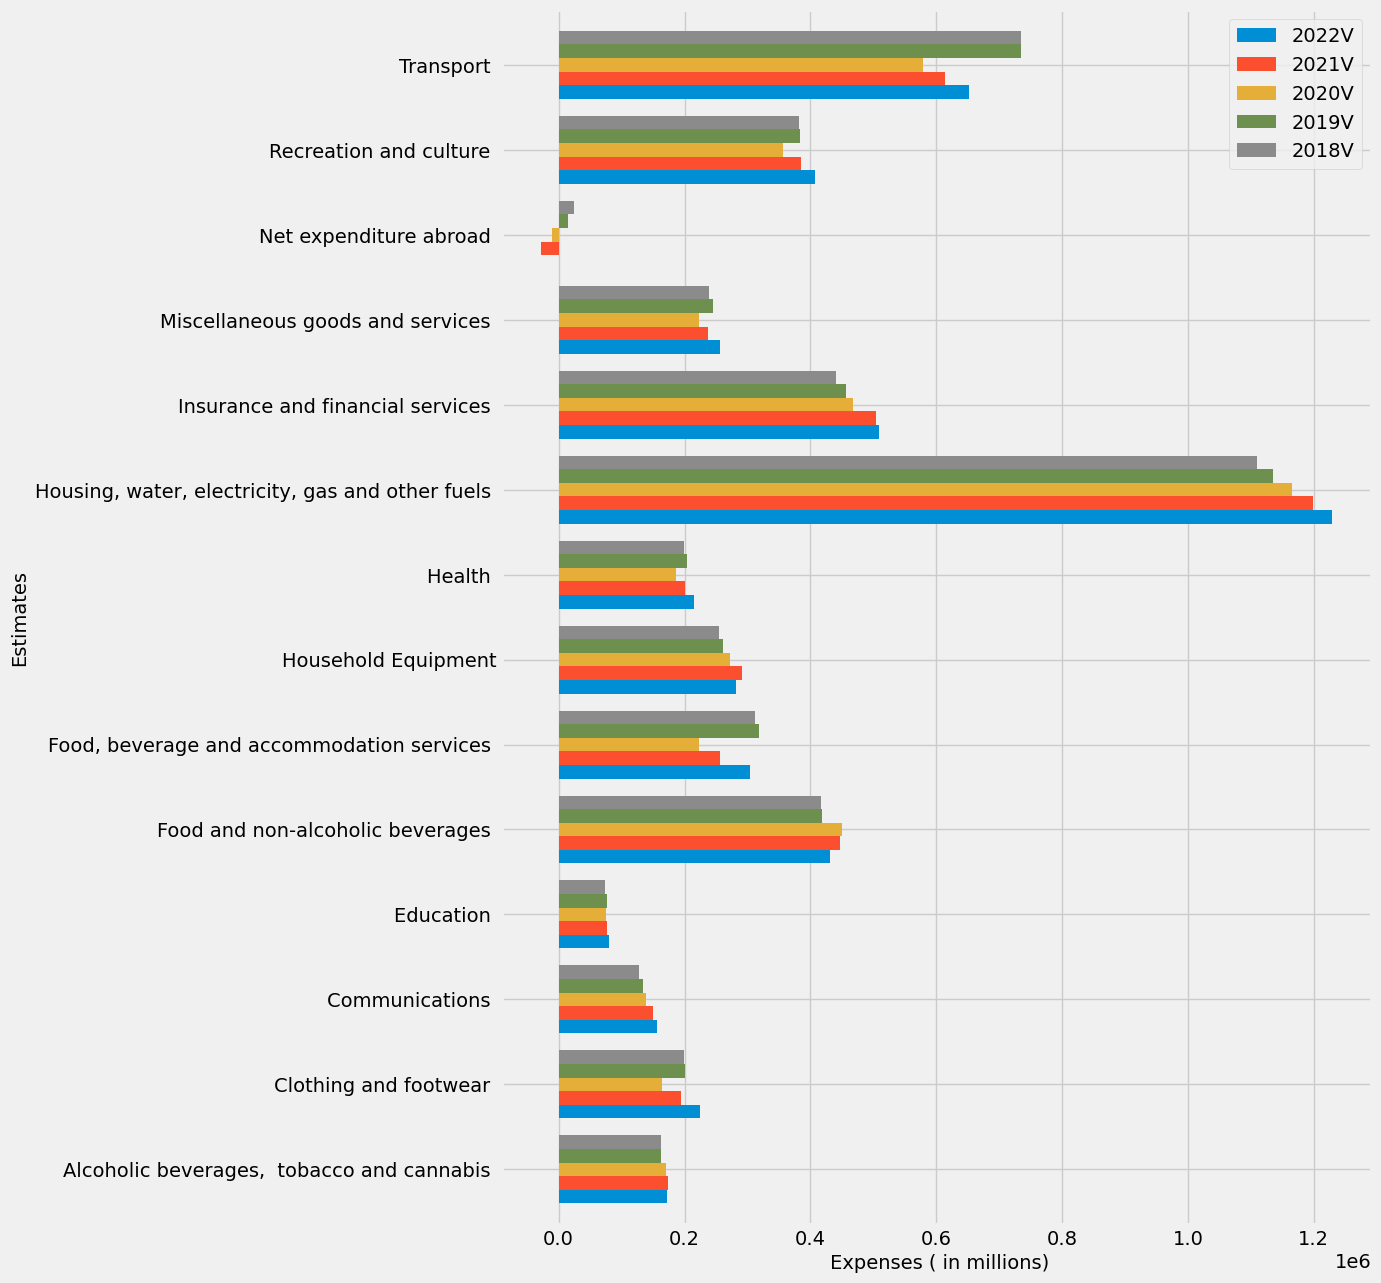

In [22]:
# Bar chart of year 2018 ~ 2022 expenditure

plot1 =merge.plot(kind = "barh" ,xlabel= " Expenses ( in millions)", width = 0.8, figsize=(10,15),)
matplotlib.style.use('fivethirtyeight')

plt.show()

In [23]:
merge

,2022V,2021V,2020V,2019V,2018V
Estimates,,,,,
"Alcoholic beverages, tobacco and cannabis",171608,173929,171243,162677,162741
Clothing and footwear,224931,193730,163667,201448,199117
Communications,156765,149066,138396,133951,127348
Education,79914,76364,75572,77016,74365
Food and non-alcoholic beverages,431236,447520,449754,417892,416591
"Food, beverage and accommodation services",304513,255966,222441,318419,311833
Household Equipment,281618,291442,272205,261170,254043
Health,214867,201265,186087,204621,199588
"Housing, water, electricity, gas and other fuels",1229010,1198077,1165092,1135754,1109154


Category that did not change after covid:
Insurances and financial services
Housing and Utilities
Communications



In [24]:
merge

,2022V,2021V,2020V,2019V,2018V
Estimates,,,,,
"Alcoholic beverages, tobacco and cannabis",171608,173929,171243,162677,162741
Clothing and footwear,224931,193730,163667,201448,199117
Communications,156765,149066,138396,133951,127348
Education,79914,76364,75572,77016,74365
Food and non-alcoholic beverages,431236,447520,449754,417892,416591
"Food, beverage and accommodation services",304513,255966,222441,318419,311833
Household Equipment,281618,291442,272205,261170,254043
Health,214867,201265,186087,204621,199588
"Housing, water, electricity, gas and other fuels",1229010,1198077,1165092,1135754,1109154


In [25]:
#Picking Education
edu = merge.iloc[[3]]
edu
# Changing the order
edu = edu[['2018V','2019V','2020V','2021V','2022V']]


In [26]:
edu2 =edu.transpose()

edu2

Estimates,Education
2018V,74365
2019V,77016
2020V,75572
2021V,76364
2022V,79914


<Axes: xlabel='Years'>

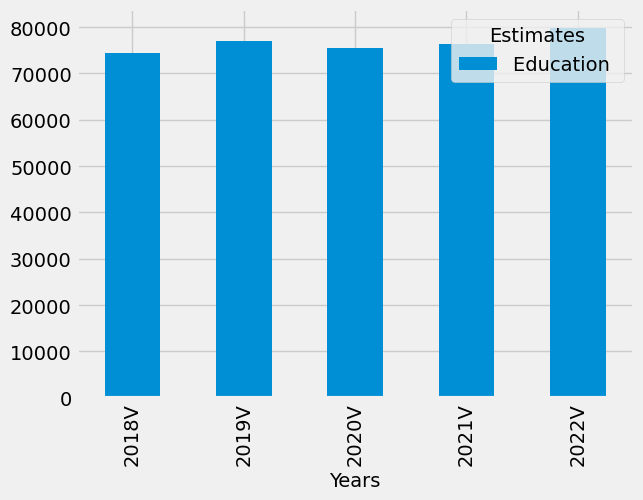

In [27]:

#Plotting
edu2.plot(kind = "bar" ,xlabel= "Years",)

In [28]:
filter_data_net.index.unique()

Index(['Alcoholic beverages,  tobacco and cannabis ', 'Clothing and footwear ',
       'Communications ', 'Education ', 'Food and non-alcoholic beverages ',
       'Food, beverage and accommodation services ',
       'Furnishings, household equipment and other goods and services related to the dwelling and property ',
       'Health ', 'Household final consumption expenditure ',
       'Housing, water, electricity, gas and other fuels ',
       'Insurance and financial services ',
       'Miscellaneous goods and services ', 'Net expenditure abroad ',
       'Recreation and culture ', 'Transport '],
      dtype='object', name='Estimates')

In [29]:
final_expense = filter_data_net.loc['Household final consumption expenditure ']

final_expense

,REF_YEAR,UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
Estimates,,,,,,,,
Household final consumption expenditure,2018,324,24,4669505,0.0,0.0,0.0,0
Household final consumption expenditure,2019,324,24,4738960,0.0,0.0,0.0,0
Household final consumption expenditure,2020,324,24,4439946,0.0,0.0,0.0,0
Household final consumption expenditure,2021,324,24,4666014,0.0,0.0,0.0,0
Household final consumption expenditure,2022,324,24,4887941,0.0,0.0,0.0,0


In [30]:
final_expense.set_index('REF_YEAR')

,UOM_ID,SCALAR_ID,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
REF_YEAR,,,,,,,
2018,324,24,4669505,0.0,0.0,0.0,0
2019,324,24,4738960,0.0,0.0,0.0,0
2020,324,24,4439946,0.0,0.0,0.0,0
2021,324,24,4666014,0.0,0.0,0.0,0
2022,324,24,4887941,0.0,0.0,0.0,0


In [40]:
# Define a function to create Linear Regression plots
def linger_regression_plot(x,y,title,location):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,location,fontsize=18,color="red")
    plt.xlabel('Years')
    plt.ylabel(title)
    plt.xticks(x,rotation = 'vertical')
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [41]:
x = final_expense['REF_YEAR']
y = final_expense['VALUE']

The r-value is: 0.12656170020302893


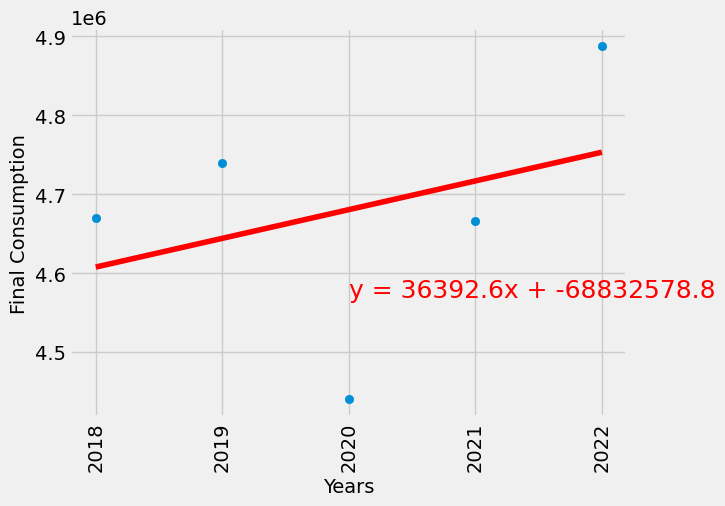

In [48]:
linger_regression_plot(x, y, "Final Consumption", (2020,4569505) )


In [ ]:
# As we can see, there is clearly an upward linear relationship